# Primer Trabajo

Se busca entrenar un primer modelo (de regresión o clasificación) y evaluar resultados.

El Dataset contiene información sobre personas.

#### Objetivo: Predecir si la persona tiene un salario anual mayor a 50K dólares.

### Consignas:

* Definir qué análisis les parece necesario hacer,
* Qué algoritmo utilizar
* Qué métrica medir (justificando por qué).

Se busca que el notebook sea una especie de "informe"

1. Deben identificar si se trata de un problema de regresión o clasificación,
2. Hacer un análisis exploratorio de los datos (presentando conclusiones siempre)
3. Finalmente entrenar un modelo para generar sus predicciones.

Pueden agregar datos de otras fuentes (por ejemplo datasets públicos del país, o lo que sea) siempre justificando sus decisiones.

Son libres de probar cualquiera de los modelos estudiados, pueden dejar los resultados de todo lo que prueben con sus correspondientes conclusiones para mostrar cómo llegan al resultado final.

Se les entrega 3 archivos:
- train.csv: Es el dataset que utilizarán para entrenar su modelo. Contiene features y el target
- test.csv: Este archivo, contiene únicamente features (incluyendo el ID de la persona). Ustedes deben predecir el target para todas estas personas y armar un archivo que contenga las columnas ID, PRED
- submit_example.csv: El archivo que entreguen tiene que tener exactamente este formato, pero con sus predicciones. Es decir, tiene que contener las columnas ID (que se corresponde al ID de la persona en el set test.csv) y PRED (que toma los valores 1 y 0. 1 significa que la persona gana más de 50K y 0 significa que no).

Deben entregar:
- Notebook con análisis e implementación del modelo predictivo
- Archivo en formato csv con las predicciones para el set de test.

## A tener en cuenta

- En la columna workclass van a ver los valores: 'Self-emp-not-inc' y 'Self-emp-inc' [acá](https://smallbiztrends.com/2013/11/incorporated-versus-unincorporated-self-employment.html) pueden encontrar info sobre su significado.
- Con pandas tienen la función to_csv que les permite exportar un dataframe a csv. Recuerden que tienen que especificar en el parámetro index, que no quieren que el index quede en el archivo csv.

# -------------------------------------------------------------------

# Biblitoecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Data set

In [ ]:
df = pd.read_csv(r"train.csv")

In [ ]:
df.sample(10)

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
1905,22858,38,Self-emp-inc,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,70,United-States,>50K,22848
3634,17924,36,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K,17918
1511,9792,38,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K,9790
27418,18053,42,State-gov,Bachelors,13,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K,18047
623,24289,64,Self-emp-inc,1st-4th,2,Married-civ-spouse,Sales,Husband,White,Male,0,0,20,United-States,<=50K,24274
14820,32067,30,Self-emp-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,70,United-States,<=50K,32044
6008,21949,37,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,21940
19808,7036,49,State-gov,11th,7,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K,7036
6912,15509,17,?,10th,6,Never-married,?,Own-child,White,Male,0,0,8,United-States,<=50K,15505
12978,4096,67,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,1797,0,40,United-States,<=50K,4096


# Descripcion del Dataset

## Columnas

index = indice

age = edad

workclass = donde trabaja

education = nivel maximo de educacion alcanzado?

education number = parece ser un indicador del tipo de educacion alcanzado

marital.status = estado civil

ocupation = ocupacion, trabajo que desempeña

relationship = tipo de relacion que tiene ahora?

race = raza

sex = sexo

capital gain =

capital loss =

native country = pais de nacimiento

income = ingresos ---> TARGET


# Analisis exploratorio (EDA)

In [ ]:
lista_columnas = df.columns
filas, columnas = df.shape
print("Las filas son: ", filas)
print("Las columnas son: ", columnas)

Las filas son:  27656
Las columnas son:  16


In [ ]:
df.info("Dtype")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           27656 non-null  int64 
 1   age             27656 non-null  int64 
 2   workclass       27656 non-null  object
 3   education       27656 non-null  object
 4   education.num   27656 non-null  int64 
 5   marital.status  27656 non-null  object
 6   occupation      27656 non-null  object
 7   relationship    27656 non-null  object
 8   race            27656 non-null  object
 9   sex             27656 non-null  object
 10  capital.gain    27656 non-null  int64 
 11  capital.loss    27656 non-null  int64 
 12  hours.per.week  27656 non-null  int64 
 13  native.country  27656 non-null  object
 14  income          27656 non-null  object
 15  ID              27656 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 3.4+ MB


In [ ]:
# Existencia de nulos
df.isna().sum()

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
ID                0
dtype: int64

#### Conclusiones parciales: NO se encontraron valores nulos como tal, pero se denotan con un "?" (signo de interrogación)

In [ ]:
# Aca un ejemplo
df["workclass"].unique()

array(['Local-gov', 'Private', 'Federal-gov', 'Self-emp-not-inc', '?',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

#### Se calcula la cantidad de "?" existentes en términos porcentuales

In [ ]:
contador_signo = (df[lista_columnas] == "?").sum()
contador_signo/filas * 100

index             0.000000
age               0.000000
workclass         5.564796
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.590107
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.822389
income            0.000000
ID                0.000000
dtype: float64

#### Como máximo (caso más pesimista), un 13% del dataset son valores nulos

In [ ]:
print("La cantidad de unicos en education es:", df["education"].nunique())
print("La cantidad de unicos en education.num es:", df["education.num"].nunique())

La cantidad de unicos en education es: 16
La cantidad de unicos en education.num es: 16


In [ ]:
educacion = [df["education"].unique()]
educacion_num = [df["education.num"].unique()]
print(educacion)
print(educacion_num)

[array(['HS-grad', 'Bachelors', 'Some-college', '7th-8th', 'Assoc-voc',
       'Masters', 'Assoc-acdm', '1st-4th', '5th-6th', 'Prof-school',
       '9th', '10th', '11th', '12th', 'Doctorate', 'Preschool'],
      dtype=object)]
[array([ 9, 13, 10,  4, 11, 14, 12,  2,  3, 15,  5,  6,  7,  8, 16,  1],
      dtype=int64)]


In [ ]:
educacion = df["education"].unique().tolist()
educacion_num = df["education.num"].unique()

# Crea un nuevo DataFrame con las columnas combinadas
df_educacion = pd.DataFrame(list(zip(educacion, educacion_num)), columns=["educacion", "educacion_num"])

# Ordena las filas según el valor de educacion_num
df_educacion = df_educacion.sort_values(by="educacion_num")

# Muestra el resultado
print(df_educacion.to_markdown(index=False))

| educacion    |   educacion_num |
|:-------------|----------------:|
| Preschool    |               1 |
| 1st-4th      |               2 |
| 5th-6th      |               3 |
| 7th-8th      |               4 |
| 9th          |               5 |
| 10th         |               6 |
| 11th         |               7 |
| 12th         |               8 |
| HS-grad      |               9 |
| Some-college |              10 |
| Assoc-voc    |              11 |
| Assoc-acdm   |              12 |
| Bachelors    |              13 |
| Masters      |              14 |
| Prof-school  |              15 |
| Doctorate    |              16 |


In [ ]:
# Obtén los valores únicicos de ambas columnas
educacion = df["education"].unique().tolist()
educacion_num = df["education.num"].unique()

# Crea un diccionario vacío
diccionario_educacion = {}

# Agrega los pares clave-valor al diccionario
for i, num in enumerate(educacion_num):
    diccionario_educacion[num] = educacion[i]

# Muestra el resultado
print(diccionario_educacion)

{9: 'HS-grad', 13: 'Bachelors', 10: 'Some-college', 4: '7th-8th', 11: 'Assoc-voc', 14: 'Masters', 12: 'Assoc-acdm', 2: '1st-4th', 3: '5th-6th', 15: 'Prof-school', 5: '9th', 6: '10th', 7: '11th', 8: '12th', 16: 'Doctorate', 1: 'Preschool'}


#### Education.num es un indice del tipo de ocupacion, asi que podemos descartar la columna de educacion y trabajar con el indicador numérico

In [ ]:
lista_columnas

Index(['index', 'age', 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'ID'],
      dtype='object')

In [ ]:
hacer_unique = ["workclass", "education", "marital.status", "occupation", "relationship", "sex", "capital.gain", 'capital.loss', "native.country", "income"]
for i in hacer_unique:
    print(f"unique de {i} es {df[i].unique()}")
    print()

unique de workclass es ['Local-gov' 'Private' 'Federal-gov' 'Self-emp-not-inc' '?' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

unique de education es ['HS-grad' 'Bachelors' 'Some-college' '7th-8th' 'Assoc-voc' 'Masters'
 'Assoc-acdm' '1st-4th' '5th-6th' 'Prof-school' '9th' '10th' '11th' '12th'
 'Doctorate' 'Preschool']

unique de marital.status es ['Divorced' 'Married-civ-spouse' 'Never-married' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

unique de occupation es ['Protective-serv' 'Exec-managerial' 'Craft-repair' 'Prof-specialty'
 'Tech-support' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Farming-fishing' 'Handlers-cleaners' '?' 'Sales' 'Machine-op-inspct'
 'Priv-house-serv' 'Armed-Forces']

unique de relationship es ['Own-child' 'Wife' 'Husband' 'Not-in-family' 'Unmarried' 'Other-relative']

unique de sex es ['Female' 'Male']

unique de capital.gain es [    0  7688  7298  3781  1424 20051  2202  4865  4386 14084 15024 99999
  3103  1506 

#### Luego de una primera limpieza de datos, se evalua de forma expeditiva si se encuentra algun valor extraño en las columnas

#### marital.status = nada raro
#### relationship   = nada raro
#### sex            = solo 2, nada raro
#### capital        = nada raro, no aparecen otros valores que no sean numericos al menos
#### native.country = nada raro salvo los "?"
#### income         = solo dos valores (se puede reemplazar por booleano)

## Evaluacion: Posibles valores atípicos en EDAD y HORAS POR SEMANA?

C:\Program Files\KMSpico\temp\ipykernel_8060\3020337532.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axs[1] = sns.distplot(x=df["age"], ax=axs[1])


Text(0.5, 1.0, 'Distribución de edades')

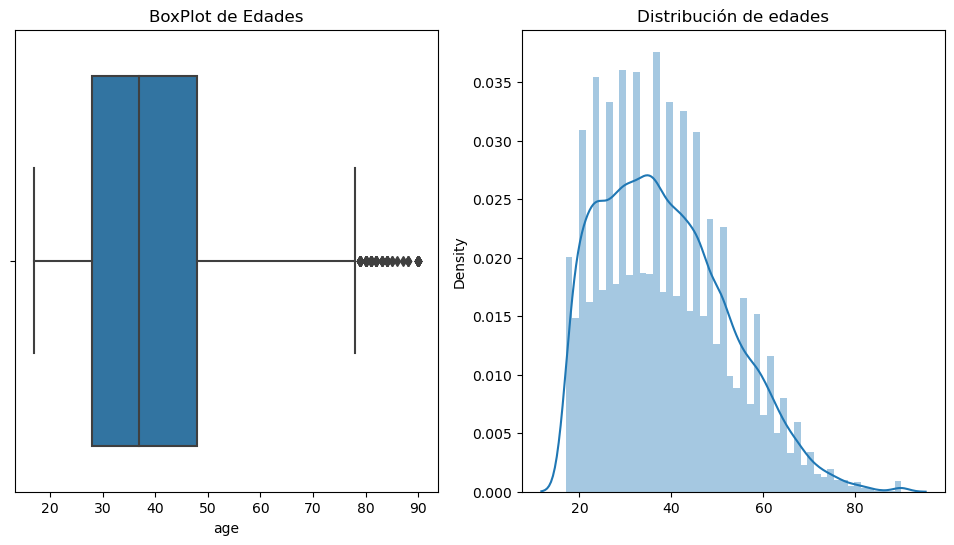

In [ ]:
# Valores atipicos en la EDAD y HORAS POR SEMANA???
#Age -> boxplot
#hours.per.week -> boxplot

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafico 1: Boxplot
axs[0] = sns.boxplot(x=df["age"], ax=axs[0])
axs[0].set_title("BoxPlot de Edades")

# Grafico 2: Distribución
axs[1] = sns.distplot(x=df["age"], ax=axs[1])
axs[1].set_title("Distribución de edades")

In [ ]:
print(df["age"].min())
print(df["age"].max())
print(df["age"].mean())

17
90
38.610355799826436


In [ ]:
print((df["age"]==90).sum())

37


#### Si bien hay varias edades mayores, no parecen ser erroneas

C:\Program Files\KMSpico\temp\ipykernel_8060\1198053327.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axs[1] = sns.distplot(x=df["hours.per.week"], ax=axs[1])


Text(0.5, 1.0, 'Distribución de horas por semana')

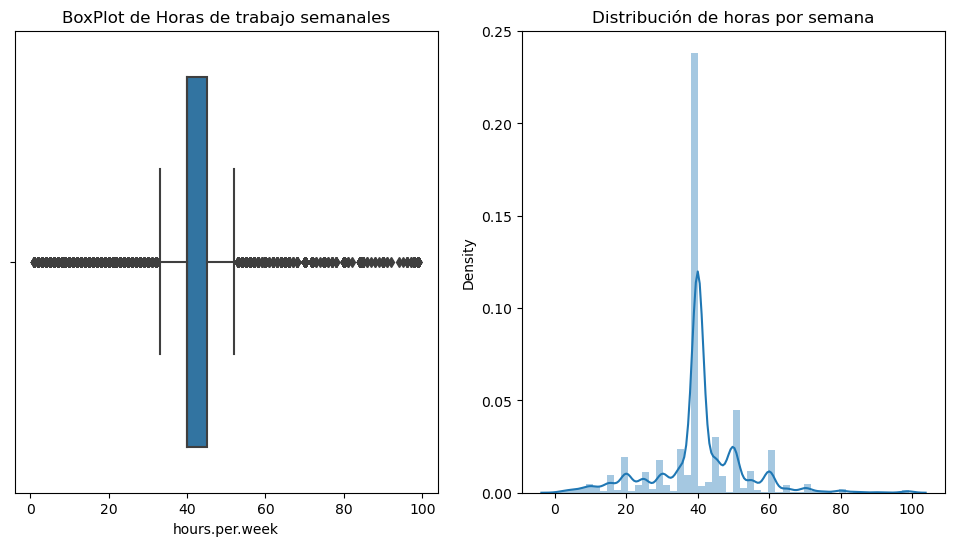

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafico 1: Boxplot
axs[0] = sns.boxplot(x=df["hours.per.week"], ax=axs[0])
axs[0].set_title("BoxPlot de Horas de trabajo semanales")

# Grafico 2: Distribución
axs[1] = sns.distplot(x=df["hours.per.week"], ax=axs[1])
axs[1].set_title("Distribución de horas por semana")

In [ ]:
min_hs_por_semana = df["hours.per.week"].min()
max_hs_por_semana = df["hours.per.week"].max()
media_hs_por_semana = df["hours.per.week"].mean()

In [ ]:
(df["hours.per.week"] == 99).sum() / filas * 100

0.26757304020827305

#### Si bien la media es logica, no me parece logico que haya personas que trabajan TANTAS horas por semana
##### Sin embargo, la distribucion de probabilidad es correcta a priori. Muy concentrada en 40hs (8hs*5)

### Evaluaciones logicas que se pueden hacer en un analisis más a fondo:
1. Personas que trabajan < media y ganan > 50k
2. Personas > a X años que trabajan > que la media
3. Nativos de paises con "?" que trabajen MUY poco y ganen >50k

### Evaluacion del Punto 2 - Personas mayores trabajando más de la media

In [ ]:
mascara_mayores60 = df["age"] > 60
mascara_horas_mayores = df["hours.per.week"] > 80

In [ ]:
df[mascara_mayores60 & mascara_horas_mayores]

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
407,22552,64,Local-gov,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,<=50K,22543
469,13575,61,Private,HS-grad,9,Divorced,Farming-fishing,Not-in-family,White,Female,0,0,82,United-States,<=50K,13572
2499,17603,90,Private,HS-grad,9,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K,17597
4138,16975,62,Private,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,91,United-States,<=50K,16970
5455,21638,72,Private,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,99,?,<=50K,21629
7323,13771,68,Local-gov,10th,6,Separated,Other-service,Not-in-family,Black,Female,0,0,90,United-States,<=50K,13768
8983,24622,66,Private,Bachelors,13,Married-civ-spouse,Priv-house-serv,Other-relative,White,Male,0,0,99,United-States,<=50K,24607
11138,23606,62,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,84,United-States,<=50K,23594
12145,26305,65,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K,26290
13681,21675,61,Self-emp-inc,Masters,14,Widowed,Exec-managerial,Unmarried,White,Female,0,0,99,United-States,<=50K,21666


### Evaluacion de Personas jovenes que trabajen menos de la media

In [ ]:
mascara_hora_menor = df["hours.per.week"] < 10
mascara_edad_menor = df["age"] < 30
df[mascara_hora_menor & mascara_edad_menor]

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
75,4989,23,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,7,United-States,<=50K,4989
245,10129,23,Private,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,5,United-States,<=50K,10127
249,32086,18,Private,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,5,United-States,<=50K,32063
487,8358,18,Private,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,8,United-States,<=50K,8358
549,24539,20,Private,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,8,United-States,<=50K,24524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26873,22310,22,?,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,6,United-States,<=50K,22301
26913,20365,22,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,9,United-States,<=50K,20358
27121,18231,18,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,8,United-States,<=50K,18225
27187,4642,17,Private,9th,5,Never-married,Other-service,Not-in-family,White,Male,0,0,6,United-States,<=50K,4642


##### ID 22543 me hace ruido
##### Todos los de 99 horas me hacen ruido... habra sido un error humano? Habran querido especificar algo en el DS? (a pesar de eso, son muy pocos)

### Evaluacion del punto 1 - Personas que trabajan menos de la media y ganan más de 50k... que son? que actividades desarrollan?

In [ ]:
mascara_trabaja_menos_horas  = df["hours.per.week"] < media_hs_por_semana
mascara_gana50k = df["income"] == ">50K"
df_trabajan_poco_ganan_mucho = df[mascara_trabaja_menos_horas & mascara_gana50k]
df_trabajan_poco_ganan_mucho

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
7,32134,59,Federal-gov,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K,32111
10,31066,54,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,31044
15,20213,44,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,>50K,20206
19,2851,62,?,Some-college,10,Married-civ-spouse,?,Husband,White,Male,7298,0,40,United-States,>50K,2851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27636,8322,29,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K,8322
27641,14427,40,Private,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,14423
27644,29931,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,37,?,>50K,29910
27652,5390,51,Private,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K,5390


C:\Program Files\KMSpico\temp\ipykernel_8060\3555097115.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
C:\Program Files\KMSpico\temp\ipykernel_8060\3555097115.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
C:\Program Files\KMSpico\temp\ipykernel_8060\3555097115.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)


[Text(0, 0, 'Private'),
 Text(1, 0, 'Federal-gov'),
 Text(2, 0, 'Local-gov'),
 Text(3, 0, '?'),
 Text(4, 0, 'Self-emp-not-inc'),
 Text(5, 0, 'Self-emp-inc'),
 Text(6, 0, 'State-gov')]

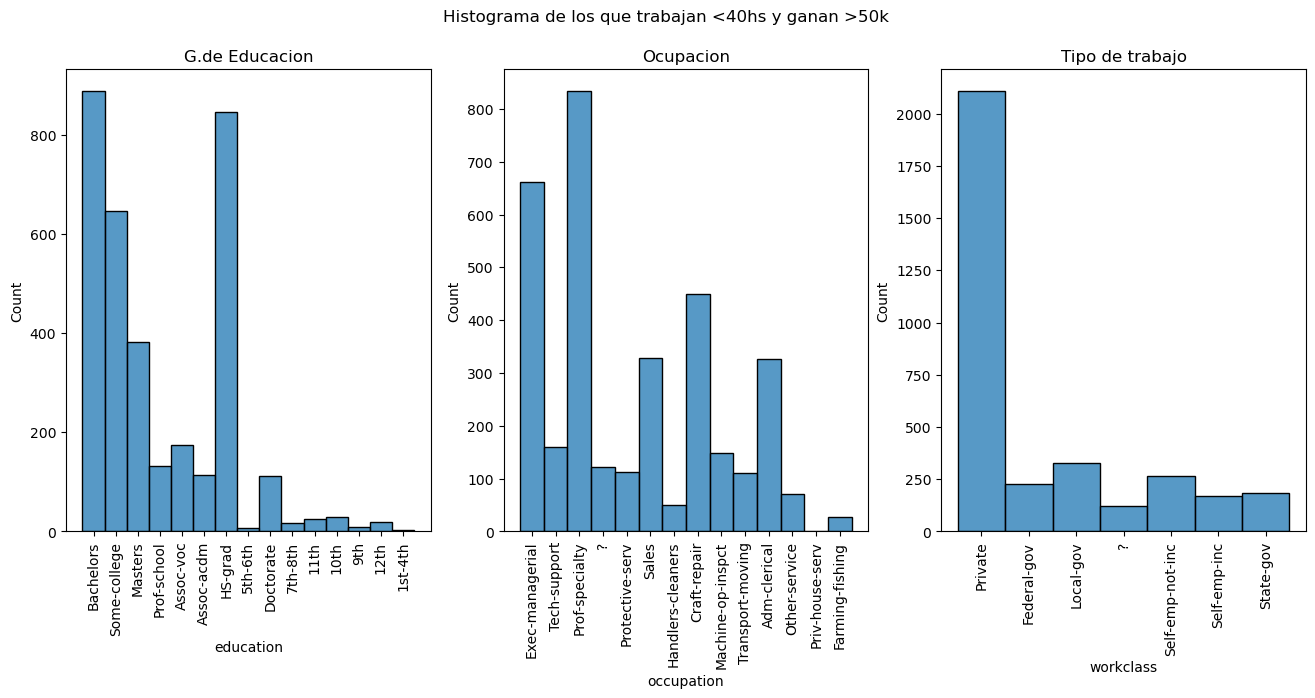

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle("Histograma de los que trabajan <40hs y ganan >50k")

# Grafico 1: Educacion
axs[0] = sns.histplot(x=df_trabajan_poco_ganan_mucho["education"], ax=axs[0])
axs[0].set_title("G.de Educacion")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)

# Grafico 2: Ocupacion
axs[1] = sns.histplot(x=df_trabajan_poco_ganan_mucho["occupation"], ax=axs[1])
axs[1].set_title("Ocupacion")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)

# Grafico 3: Tipo de Trabajo
axs[2] = sns.histplot(x=df_trabajan_poco_ganan_mucho["workclass"], ax=axs[2])
axs[2].set_title("Tipo de trabajo")
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)

In [ ]:
indices = [4,6,7,9,10,13,14]
for i in indices:
    print(f"i={i} == {diccionario_educacion[i]}")

i=4 == 7th-8th
i=6 == 10th
i=7 == 11th
i=9 == HS-grad
i=10 == Some-college
i=13 == Bachelors
i=14 == Masters


#### Hay cosas MUY RARAS (aunque son pocas)
##### Ejemplo: ID 28218 = 78 años, autoempleado, reparador artenasal, TRABAJA 3HS SEMANALES y cobra >50k... que repara?

## Analisis: Personas que trabajan mucho y ganan poco... que son? que actividades desarrollan?

In [ ]:
mascara_trabaja_mas_horas  = df["hours.per.week"] >= media_hs_por_semana
mascara_gana_menos50k = df["income"] == "<=50K"
df_trabajan_mucho_ganan_poco = df[mascara_trabaja_mas_horas & mascara_gana_menos50k]
df_trabajan_mucho_ganan_poco

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
5,18132,32,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K,18126
14,28950,66,Self-emp-not-inc,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Male,0,0,50,United-States,<=50K,28932
16,15536,39,Private,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,49,United-States,<=50K,15532
23,19781,31,Private,7th-8th,4,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,50,United-States,<=50K,19774
26,16596,62,Private,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K,16591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27618,27497,31,Private,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,45,United-States,<=50K,27480
27626,5051,18,Private,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,45,United-States,<=50K,5051
27645,16855,36,State-gov,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,0,0,60,United-States,<=50K,16850
27646,6265,34,Private,Assoc-acdm,12,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,<=50K,6265


C:\Program Files\KMSpico\temp\ipykernel_8060\495448639.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
C:\Program Files\KMSpico\temp\ipykernel_8060\495448639.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
C:\Program Files\KMSpico\temp\ipykernel_8060\495448639.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)


[Text(0, 0, 'Private'),
 Text(1, 0, 'Self-emp-not-inc'),
 Text(2, 0, 'Self-emp-inc'),
 Text(3, 0, 'State-gov'),
 Text(4, 0, 'Local-gov'),
 Text(5, 0, '?'),
 Text(6, 0, 'Without-pay'),
 Text(7, 0, 'Federal-gov')]

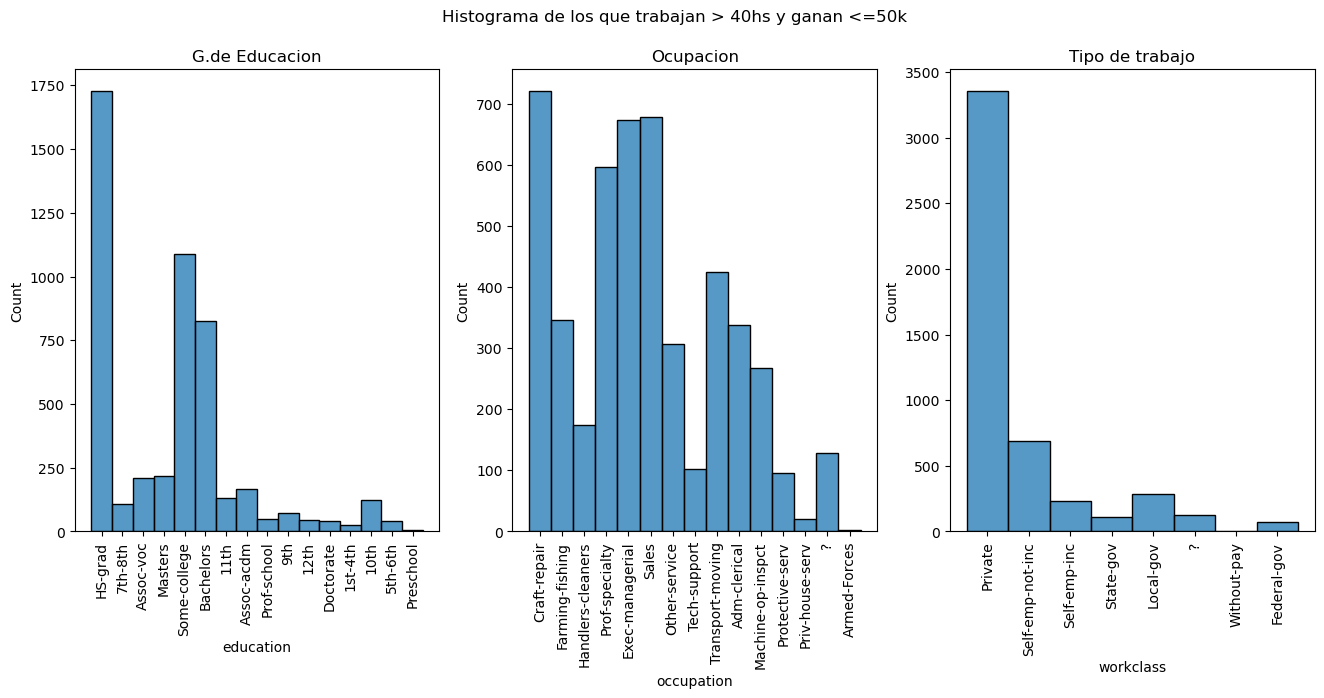

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle("Histograma de los que trabajan > 40hs y ganan <=50k")

# Grafico 1: Educacion
axs[0] = sns.histplot(x=df_trabajan_mucho_ganan_poco["education"], ax=axs[0])
axs[0].set_title("G.de Educacion")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)

# Grafico 2: Ocupacion
axs[1] = sns.histplot(x=df_trabajan_mucho_ganan_poco["occupation"], ax=axs[1])
axs[1].set_title("Ocupacion")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)

# Grafico 3: Tipo de Trabajo
axs[2] = sns.histplot(x=df_trabajan_mucho_ganan_poco["workclass"], ax=axs[2])
axs[2].set_title("Tipo de trabajo")
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)

#### Categoria without-pay? No hay informacion. Refiere a voluntariados o esa clase de tabajos?

In [ ]:
(df_trabajan_mucho_ganan_poco["workclass"] == "Without-pay").sum()

4

In [ ]:
maskWP = (df_trabajan_mucho_ganan_poco["workclass"] == "Without-pay")
df_trabajan_mucho_ganan_poco[maskWP]

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
811,28377,72,Without-pay,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,55,United-States,<=50K,28360
9017,25647,62,Without-pay,Assoc-acdm,12,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,25632
10663,5866,65,Without-pay,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K,5866
19189,26423,29,Without-pay,Some-college,10,Married-civ-spouse,Farming-fishing,Own-child,White,Male,0,0,65,United-States,<=50K,26408


## Distribucion de la variable objetivo

Text(0.5, 1.0, 'Histograma')

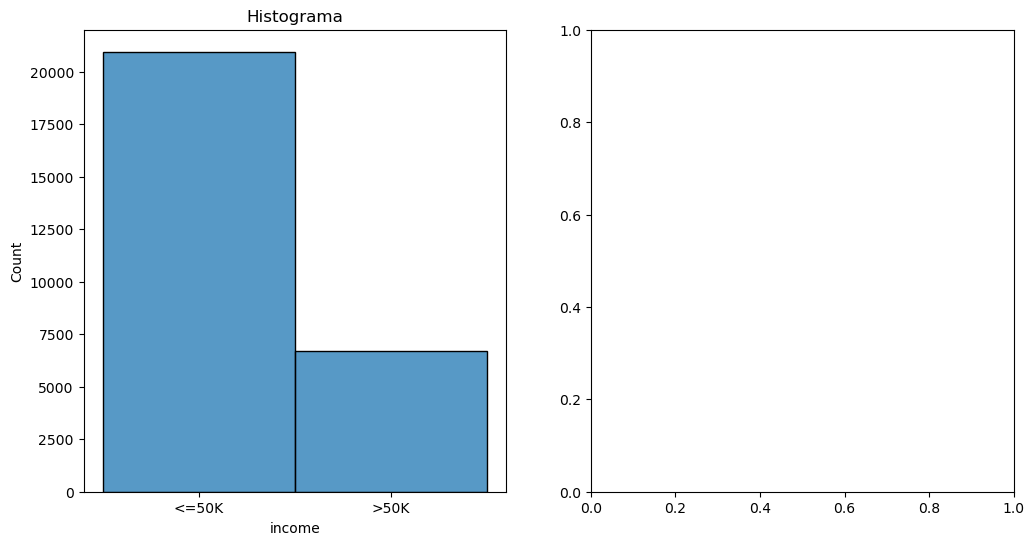

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafico 1: Boxplot
axs[0] = sns.histplot(x=df["income"], ax=axs[0])
axs[0].set_title("Histograma")

## Reporte del EDA


### Tabla Resumen de columnas

In [ ]:
df.columns

Index(['index', 'age', 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'ID'],
      dtype='object')

In [ ]:
n_unicos_columna = []
for col in lista_columnas:
    n_unicos_columna.append(df[col].nunique())

In [ ]:
resumen_df = pd.DataFrame()
resumen_df["columnas"] = df.columns
resumen_df["Explicacion"] = ["Indice", "Edad", "Tipo de trabajo", "Grado de educacion alcanzando", "id de la educacion", "Estado civil", "trabajo que desarrolla", "?", "raza", "sexo", "?", "?", "hs de trabajo/semana", "Pais de origen", "ingresos", "ID"]
resumen_df["Tipo Variable"] = ["Int", "Int", "CN", "CO", "Int", "CN", "CN", "CN", "CN", "CN", "Int", "Int", "Int", "CN", "CO", "Int"]
resumen_df["Nº de unicos"] = n_unicos_columna
resumen_df["Tratamiento"] = ["Eliminar", "-", "OneHot", "Eliminar", "-", "Evaluar", "OneHot", "Eliminar?", "Eliminar", "Bool", "-", "-", "-", "OneHot", "TARGET -> Bool", "-"]
resumen_df

,columnas,Explicacion,Tipo Variable,Nº de unicos,Tratamiento
0,index,Indice,Int,27656,Eliminar
1,age,Edad,Int,73,-
2,workclass,Tipo de trabajo,CN,9,OneHot
3,education,Grado de educacion alcanzando,CO,16,Eliminar
4,education.num,id de la educacion,Int,16,-
5,marital.status,Estado civil,CN,7,Evaluar
6,occupation,trabajo que desarrolla,CN,15,OneHot
7,relationship,?,CN,6,Eliminar?
8,race,raza,CN,5,Eliminar
9,sex,sexo,CN,2,Bool


### Informe de cosas encontradas
- El data set cuenta con valores nulos los cuales estan representados por un "?". Se encuentran distribuidos porcentualmente en:
  - workclass =        5.564796 %
  - occupation =       5.590107 %
  - native.country =    1.822389 %

- Existe una clase "Without-pay" en workclass (son 4 así)

- La columna "education.num" es un identificador orginal de la columna "education"

- De las variables categoricas del DS, se realizo un unique para visualizar posibles datos erroneos o que no pertenecieran a la columna, no se encontro nada extraño con salvedad de los "?".

- De las variables numericas, se realizo un analisis de dispersión para ver posibles valores atipicos o extraños. Estas columnas fueron
	1. Edad
	2. Horas de trabajo por semana
  1. Edad:
	- Se realizo un boxplot para identificar valores atipicos. El valor minimo es 17 (logico), la media ronda los 39 y los maximos los 90.
	- Si bien existen personas muy grandes trabajando, el grafico de distribución resulta esperable.
  2. Horas de trabajo por semana:
	- Se realizo un boxplot para identificar valores atipicos. Si bien la media se encuentra al rededor de 40hs, lo cual es logico para una jornada de 8x5, los valores extremos son llamativos.
	- La distribucion de probabilidad de las horas de trabajo es esperable, una normal con media fuertemente marcada rondando en 40hs.
	- Como dije antes, los valores extremos son llamativos. La maxima hora de trabajo semanal es 99hs. Aunque son < 0.5% del DS, solamente tiene sentido a razon de trabajar 7dias y aún deja muy pocas horas de margen para dormir y comer.
	- Por otra parte, existen personas que trabajan muy pocas horas a la semana.
	- Esto podria tener relacion con el pais y la cultura laboral, pero solo se cuenta con información del pais de origen, no donde estan actualmente y aun así hay valores poco logicos (los de 99hs por ejemplo)
	---
	- De esto pueden desprenderse varios analisis más. Lo realmente ilogico (solo con estas dos variables) seria:
      - a. Personas de edad mayor que trabajan mucho mas de la media (no deberian tener capacidad fisica para aguantar tanto tiempo, aun haciendo tareas de escritorio).
      - b. Se puede hacer un analisis estadistico mas en detalle involucrando las variables "tipo de trabajo", "trabajo que desarrolla" y los "incomes" con la edad y las horas.

      - c. Personas que trabajan menos de la media y cobran >50k... Que son? Que actividad desarrollan?
      - d. Personas que trabajan  más  de la media y cobran <50k... Que son? Que actividad desarrollan?

Estos analisis pueden hacerse porcentualmente, digamos cantidad de "masters" porcentualmente referido a la cantidad total de masters

# Tratamiento del DataSet
#### En base al EDA se hará lo siguiente:
+ ELIMINAR
    - Eliminar las filas donde alguna de sus celdas sea "?" (datos faltantes)
    - Eliminar la columna "education" ya que tiene su indice y esta en orden respecto al grado de educacion 16=doctorado
    - Evaluar la correlacion de la columna "marital.status" (no se considera relevante a priori)
    - Eliminar la columna "relationship". No se considera importante la relacion que ocupe en el seno familar en los ingresos
    - Eliminar la columna "race", si bien puede existir racismo y ser la causa de algunos sueldos o trabajos, se prefiere no arriesgar a sesgar el modelo. Existen otras variables mas relevantes

+ TRATAR columnas
    - Las columnas categoricas se hara un OneHotEncoder por ser categoricas nominales
    - las columnas "sex" e "income" se haran binarias

+ RESPECTO A LA RELACION LOGICA ENTRE LOS DATOS DE INGRESOS, HORAS POR SEMANA, EDAD DE LA PERSONA...
    - Hay mucho por analizar y muchas hipotesis a formular para determinar datos "extraños". Dejare sin tratar estos datos y, si el modelo presenta malos resultados, volvere a analizarlos.

## Eliminar columnas

In [ ]:
rows_with_question_mark = (df.isin(["?"]).any(axis=1))

In [ ]:
df_con_interrogacion = df.loc[rows_with_question_mark]
df_con_interrogacion

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
19,2851,62,?,Some-college,10,Married-civ-spouse,?,Husband,White,Male,7298,0,40,United-States,>50K,2851
30,3483,22,?,Some-college,10,Married-civ-spouse,?,Wife,White,Female,3781,0,35,United-States,<=50K,3483
32,31675,29,Private,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,?,<=50K,31653
36,22756,57,?,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,<=50K,22747
45,14166,31,?,9th,5,Divorced,?,Not-in-family,White,Female,0,0,25,United-States,<=50K,14163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27603,21051,28,?,10th,6,Never-married,?,Own-child,White,Female,0,0,38,United-States,<=50K,21042
27620,6396,47,Private,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K,6396
27621,28710,33,Self-emp-not-inc,Bachelors,13,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,?,<=50K,28693
27643,4426,60,?,10th,6,Divorced,?,Not-in-family,Amer-Indian-Eskimo,Female,0,0,10,United-States,<=50K,4426


In [ ]:
# Cantidad porcentual de filas con "?" --> Habiamos dicho antes que como maximo seria un 13% del DS
df_con_interrogacion.shape[0] / df.shape[0] * 100 # Este porcentaje estariamos eliminando

7.329331790569858

In [ ]:
df.shape[0] - df_con_interrogacion.shape[0] # filas que deben quedar en el df clean

25629

In [ ]:
df_sin_nulos = df.loc[~rows_with_question_mark]
df_sin_nulos.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639


In [ ]:
borrar_columnas = ["index","education", "ID", "race", "relationship"]

In [ ]:
df_limpio = df_sin_nulos.drop(columns = borrar_columnas)
df_limpio.head()

,age,workclass,education.num,marital.status,occupation,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,30,Local-gov,9,Divorced,Protective-serv,Female,0,0,32,United-States,<=50K
1,37,Private,13,Married-civ-spouse,Exec-managerial,Female,0,1848,40,United-States,>50K
2,41,Private,9,Married-civ-spouse,Craft-repair,Male,0,0,60,United-States,>50K
3,45,Private,13,Married-civ-spouse,Prof-specialty,Male,0,0,60,United-States,>50K
4,28,Private,9,Never-married,Exec-managerial,Female,0,0,40,United-States,<=50K


## Tratamiento de categoricas

### One Hot encoder

In [ ]:
### Native Country
dummy_country = pd.get_dummies(df_limpio["native.country"])
df_encoded = pd.concat([df_limpio, dummy_country], axis=1)
df_encoded.drop(columns=["native.country"], inplace=True)

### Occupation
dummy_occ = pd.get_dummies(df_encoded["occupation"])
df_encoded = pd.concat([df_encoded, dummy_occ], axis=1)
df_encoded.drop(columns=["occupation"], inplace=True)

### Workclass
dummy_wc = pd.get_dummies(df_encoded["workclass"])
df_encoded = pd.concat([df_encoded, dummy_wc], axis=1)
df_encoded.drop(columns=["workclass"], inplace=True)

### marital status
dummy_ms = pd.get_dummies(df_encoded["marital.status"])
df_encoded = pd.concat([df_encoded, dummy_ms], axis=1)
df_encoded.drop(columns=["marital.status"], inplace=True)


In [ ]:
df_encoded.head(1)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,Cambodia,Canada,China,...,Self-emp-not-inc,State-gov,Without-pay,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,30,9,Female,0,0,32,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Binarias

In [ ]:
### Sex
sex_binario = {"Male":1, "Female":0}
df_encoded['sex'] = df_encoded['sex'].map(sex_binario)

### Income -> TARGET
income_binario = {"<=50K":0, ">50K":1}
df_encoded['income'] = df_encoded['income'].map(income_binario)

In [ ]:
df_encoded.head()

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,Cambodia,Canada,China,...,Self-emp-not-inc,State-gov,Without-pay,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,30,9,0,0,0,32,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,37,13,0,0,1848,40,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,41,9,1,0,0,60,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,13,1,0,0,60,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,9,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Dataset LISTO

In [ ]:
df_listo = df_encoded.copy()
df_listo.head(1)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,Cambodia,Canada,China,...,Self-emp-not-inc,State-gov,Without-pay,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,30,9,0,0,0,32,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Correlaciones

<Axes: >

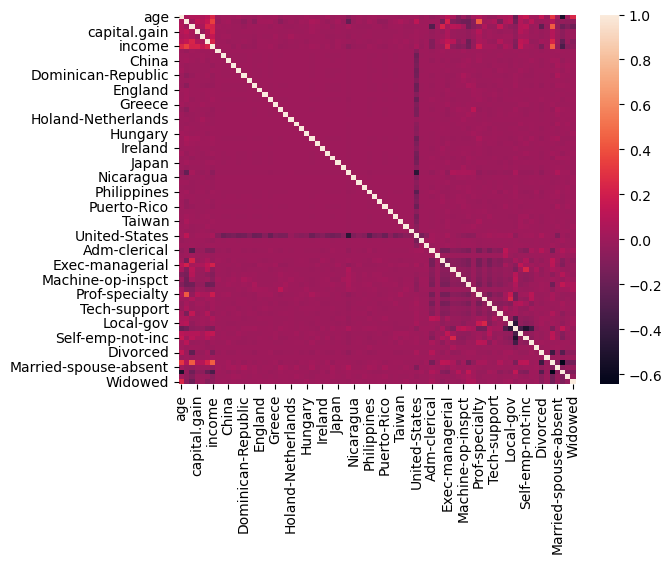

In [ ]:
sns.heatmap(df_listo.corr())

In [ ]:
correlaciones = df_listo.corr()["income"].abs() # solo quiero saber el valor absoluto para saber si existe correlacion (negativa o positiva)
correlaciones_ordenadas = correlaciones.sort_values()

porcentaje = 0.7 #porcentaje de columnas a borrar

porcentaje_a_borrar = int(porcentaje*len(correlaciones_ordenadas))
columnas_a_borrar = correlaciones_ordenadas.iloc[:porcentaje_a_borrar].index

df_listo = df_listo.drop(columnas_a_borrar, axis=1)

In [ ]:
columnas_a_borrar

Index(['Hungary', 'Thailand', 'Poland', 'Scotland', 'Greece',
       'Holand-Netherlands', 'China', 'South', 'Yugoslavia', 'Cuba', 'Ireland',
       'Cambodia', 'Hong', 'Honduras', 'France', 'Canada', 'England',
       'Ecuador', 'Armed-Forces', 'Laos', 'State-gov', 'Portugal', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Trinadad&Tobago', 'Italy', 'Haiti',
       'Without-pay', 'Married-AF-spouse', 'Philippines', 'Japan', 'Jamaica',
       'Iran', 'Taiwan', 'Tech-support', 'Nicaragua', 'Vietnam', 'Columbia',
       'Germany', 'El-Salvador', 'Puerto-Rico', 'Craft-repair', 'Guatemala',
       'India', 'Sales', 'Dominican-Republic', 'Self-emp-not-inc',
       'Protective-serv', 'Transport-moving', 'Local-gov', 'Priv-house-serv',
       'United-States', 'Married-spouse-absent'],
      dtype='object')

In [ ]:
df_listo

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,Mexico,Adm-clerical,Exec-managerial,...,Other-service,Prof-specialty,Federal-gov,Private,Self-emp-inc,Divorced,Married-civ-spouse,Never-married,Separated,Widowed
0,30,9,0,0,0,32,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,37,13,0,0,1848,40,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,41,9,1,0,0,60,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,45,13,1,0,0,60,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,28,9,0,0,0,40,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,31,9,1,0,0,40,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
27652,51,11,1,0,0,40,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
27653,55,9,1,0,1887,40,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
27654,23,13,1,0,0,25,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


<Axes: >

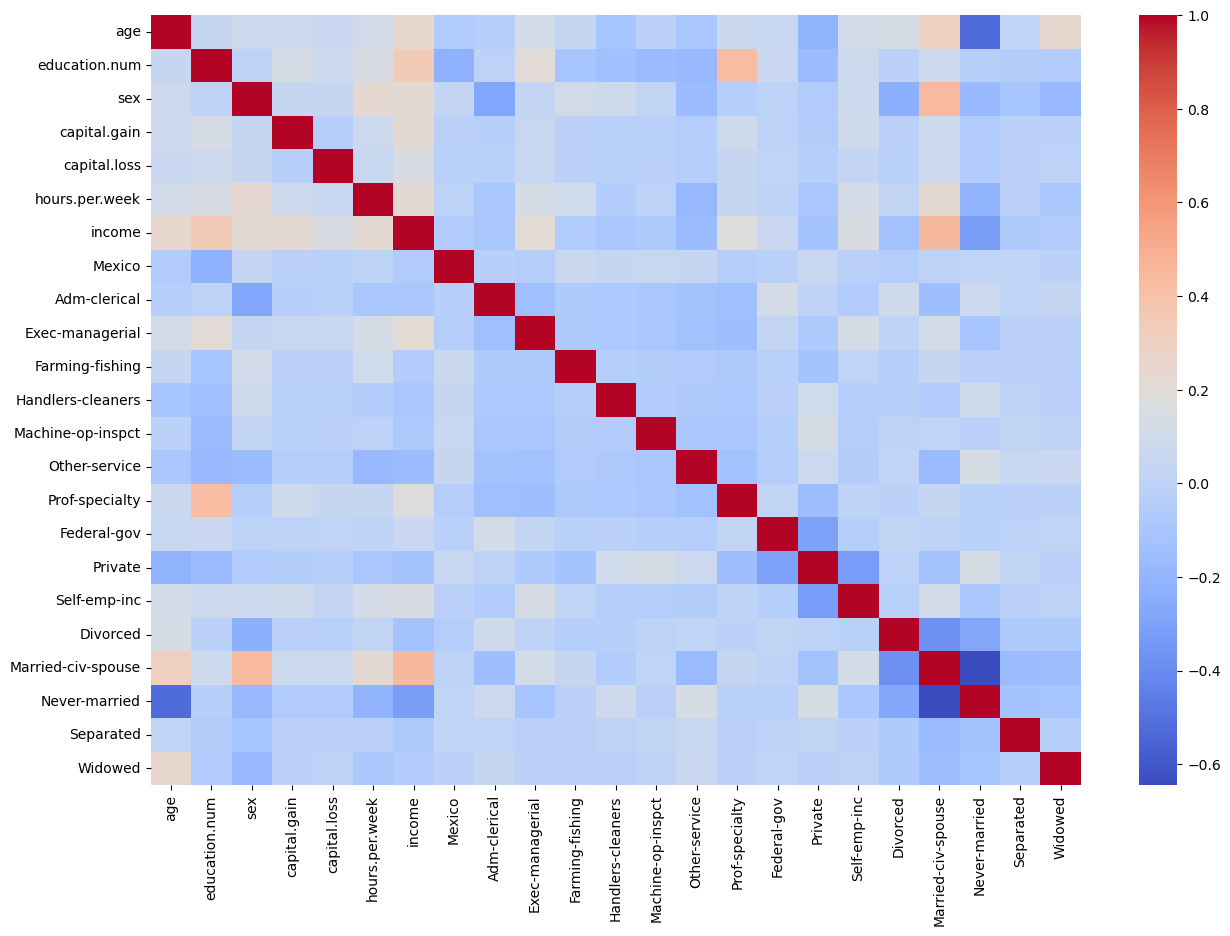

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_listo.corr(), cmap="coolwarm")

In [ ]:
df_listo.corr()["income"].abs().sort_values(ascending=False)

income                1.000000
Married-civ-spouse    0.445067
education.num         0.339435
Never-married         0.322254
age                   0.243115
hours.per.week        0.228576
capital.gain          0.222877
sex                   0.216557
Exec-managerial       0.214810
Prof-specialty        0.182692
Other-service         0.166303
capital.loss          0.151210
Self-emp-inc          0.139379
Divorced              0.129674
Private               0.118245
Adm-clerical          0.100517
Handlers-cleaners     0.095746
Machine-op-inspct     0.074280
Separated             0.072976
Mexico                0.063921
Farming-fishing       0.059116
Widowed               0.058469
Federal-gov           0.057159
Name: income, dtype: float64

# Machine Learning - Modelo de Clasificación

## Separación de train y test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df_listo["income"] # target
X = df_listo.copy().drop(columns=["income"]) # dataset SIN el target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
y_test.value_counts()

0    3842
1    1284
Name: income, dtype: int64

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20503, 22), (5126, 22), (20503,), (5126,))

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

## Definimos el clasificador:

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=12, random_state=42)

In [ ]:
clf = clf.fit(X_train, y_train)

## Feature importance

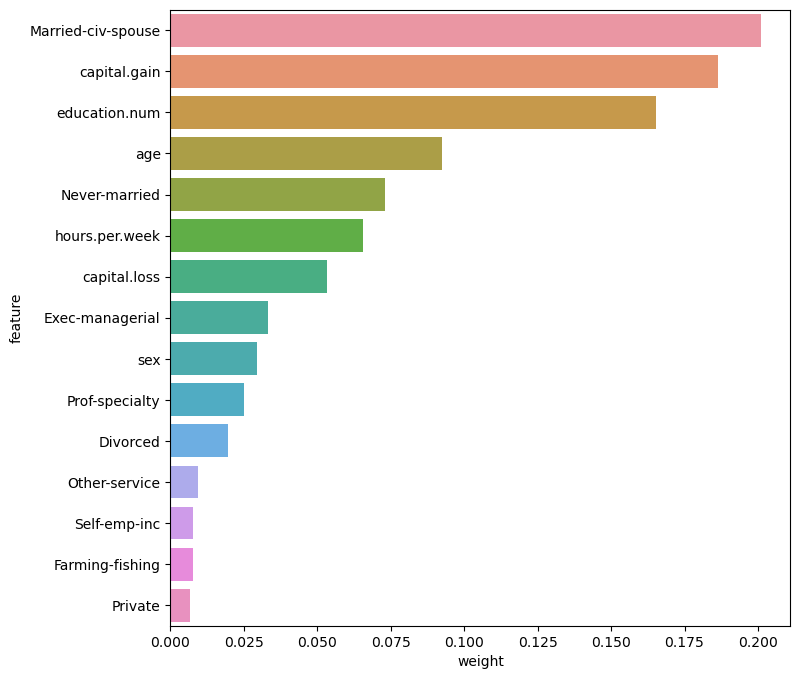

In [ ]:
plt.figure(figsize=(8, 8))
tree_feature_importance = pd.DataFrame({'feature': clf.feature_names_in_,
                                        'weight': clf.feature_importances_}).sort_values('weight',ascending=False).head(15)
sns.barplot(data=tree_feature_importance, x='weight', y='feature')
plt.show()

### Prediccion

In [ ]:
prediccion = clf.predict(X_test)
prediccion_train = clf.predict(X_train) # sobre los mismos datos con los que entrenamos, le pedimos que prediga

### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
acc_real = accuracy_score(y_test, prediccion)
acc_overfit = accuracy_score(y_train, prediccion_train)

In [ ]:
print("Acc entrenamiento es", acc_overfit)
print("Acc test es", acc_real)

Acc entrenamiento es 0.8732868360727698
Acc test es 0.8646117830667187


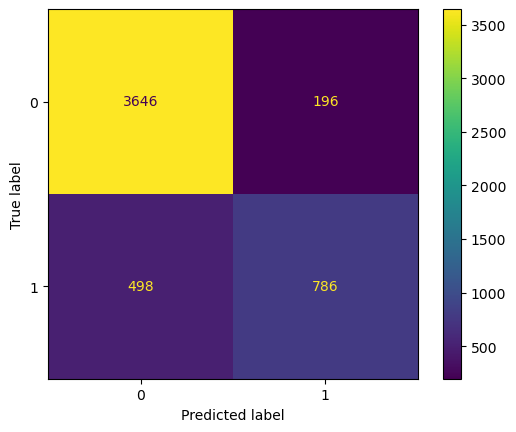

In [ ]:
matriz = confusion_matrix(y_test, prediccion)
display = ConfusionMatrixDisplay(confusion_matrix=matriz)
display.plot()

In [ ]:
print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3842
           1       0.80      0.61      0.69      1284

    accuracy                           0.86      5126
   macro avg       0.84      0.78      0.80      5126
weighted avg       0.86      0.86      0.86      5126



## Clasificacior: KNN

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#clf_knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
#fit_knn = clf_knn.fit(X_train, y_train)

In [ ]:
#type(X_train)

In [ ]:
#X_train_array = X_train.to_numpy()
#X_test_array = X_test.to_numpy()

#y_train_prediccion = fit_knn.predict(X_train_array)
#y_test_prediccion = fit_knn.predict(X_test_array)

In [ ]:
#knn_train_acc = accuracy_score(y_train, y_train_prediccion)
#knn_test_acc = accuracy_score(y_test, y_test_prediccion)
#print("Knn acc de train es:", knn_train_acc)
#print("Knn acc de test es:", knn_test_acc)

In [ ]:
#matriz_knn = confusion_matrix(y_test, y_test_prediccion)
#ConfusionMatrixDisplay(confusion_matrix=matriz_knn).plot()

In [ ]:
#print(classification_report(y_test, y_test_prediccion))

## Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from itertools import cycle

In [ ]:
y_dummy = pd.get_dummies(y_test)
y_dummy = y_dummy.to_numpy()
n_classes = y_dummy.shape[1]
print(y_dummy[:5])
print(type(y_dummy))


[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]
<class 'numpy.ndarray'>


In [ ]:
n_classes

2

In [ ]:
# Learn to predict each class
#classifier = DecisionTreeClassifier(max_de)
#classifier.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)
print(y_score[:5])

[[0.67842871 0.32157129]
 [0.93877374 0.06122626]
 [0.65160594 0.34839406]
 [0.19892084 0.80107916]
 [0.98413084 0.01586916]]


In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_dummy[:, i], y_score[:, i],)
    roc_auc[i] = auc(fpr[i], tpr[i])

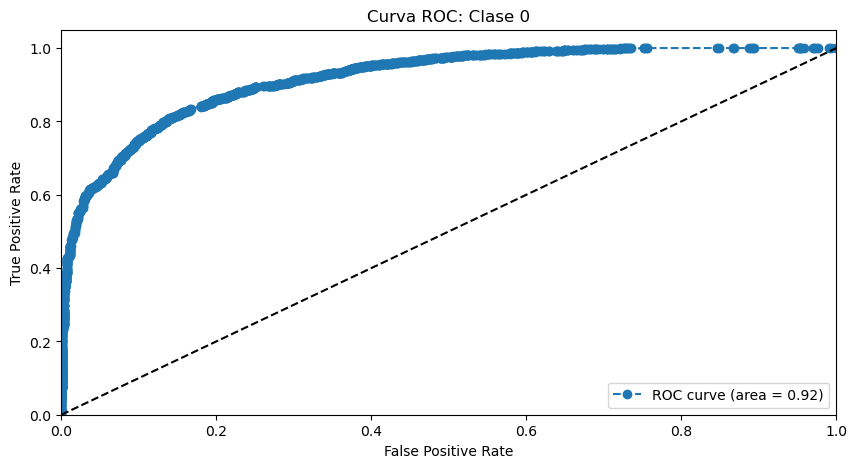

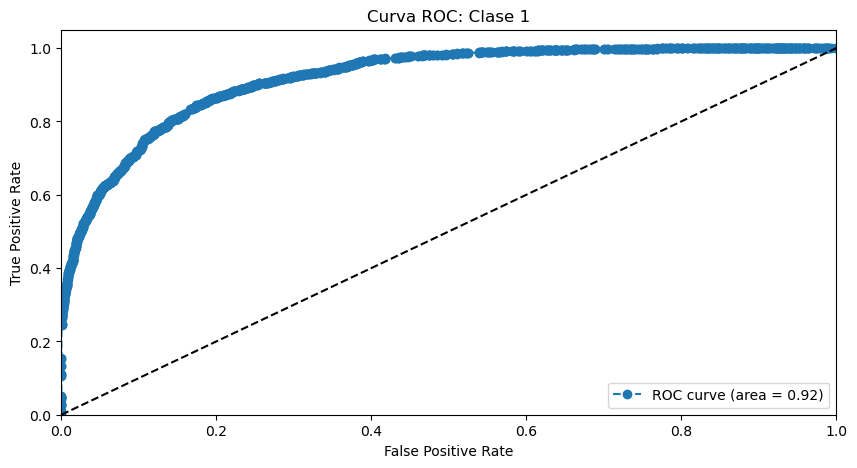

In [ ]:
for i in range(n_classes):
    plt.figure(figsize=(10,5))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.show()

# CONCLUSIONES DEL MODELO
+ Se probaron varios 3 estimadores: DecisionTree, Random Forest y KNN.
  + KNN fue el que peores resultados obtuvo en general, por eso esta comentado.
  + Entre Decision Tree y Random Forest no habia mucha diferencia pero RF rendia un poco mejor.

+ Se probaron a la vez varios hiperparametros, estratificacion, profundidad maxima, random_state, etc.
  + Respecto a la profundidad maxima, se concluyo que el "overfit" era notable en max_depth=15.

+ A su vez, se probo eliminar a priori ciertas columnas que, segun el sentido comun, no deberian tener relacion con los ingresos de cada persona.
Por ejemlo: marital_status, sin embargo, la capacidad predictiva del modelo caia notablemente al eliminarlo.

+ Respecto al feature_importance, me resulta extraño que la variable que mas peso recibio por el RF es una perteneciente a marital_status.
Segun mis hipotesis iniciales, las más importantes deberian haber sido el grado de educación, las horas trabajadas, el puesto ocupado y la edad en menor medida.
Sin embargo, como se menciono antes, la performance del modelo disminuia considerablemente al eliminar alguna columna.

+ El criterio para elegir el clasificador y los hiperparametros se baso en:
    - Accuracy de test y train para identificar overfit (aunque no se tomo esta metrica como definitiva dado a la gran disparidad entre las clases de income (Muchos incomes<50k y pocos >50k))
      (Ademas se busco que los valores de estas metricas fueran similares)
    - Por lo antes mencionado, se utilizo las metricas de precision y recall para determinar la calidad del modelo, más en especifico, el F1score.
    - El mismo (F1) vale:  
      - 0.91 para la clase 0 (income <50K) y
      - 0.69 para la clase 1 (income >50K)

+ Si bien se nota que el modelo presenta menor capacidad predictiva para la clase 1 (debido a su menor cantidad en la muestra) los valores de F1 se consideran aceptables.

# Carga del CSV de test, prediccion y exportacion

In [ ]:
df_test = pd.read_csv(r"test.csv")

In [ ]:
df_test.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,ID
0,3643,53,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States,3643
1,16041,18,?,11th,7,Never-married,?,Own-child,White,Male,0,0,25,United-States,16036
2,9403,42,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,United-States,9401
3,17909,49,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,United-States,17903
4,5198,58,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,5198


In [ ]:
df_test.shape

(4881, 15)

## Procesamiento del dataset nuevo para dejarlo como con el que se hizo el modelo

In [ ]:
### Nulos
rows_with_question_mark = (df_test.isin(["?"]).any(axis=1))
df_con_interrogacion = df_test.loc[rows_with_question_mark]
df_test_sin_nulos = df_test.loc[~rows_with_question_mark]
print(df_test_sin_nulos.shape)
#### EXTRAIGO ID DEL TEST ###
ID_test = df_test_sin_nulos["ID"]

### Se borran columnas
borrar_columnas = ["index","education", "race", "relationship", "ID"]
df_limpio = df_test_sin_nulos.drop(columns = borrar_columnas)

### Categoricas

dummy_country = pd.get_dummies(df_limpio["native.country"])
df_encoded = pd.concat([df_limpio, dummy_country], axis=1)
df_encoded.drop(columns=["native.country"], inplace=True)

### Occupation
dummy_occ = pd.get_dummies(df_encoded["occupation"])
df_encoded = pd.concat([df_encoded, dummy_occ], axis=1)
df_encoded.drop(columns=["occupation"], inplace=True)

### Workclass
dummy_wc = pd.get_dummies(df_encoded["workclass"])
df_encoded = pd.concat([df_encoded, dummy_wc], axis=1)
df_encoded.drop(columns=["workclass"], inplace=True)

### marital status
dummy_ms = pd.get_dummies(df_encoded["marital.status"])
df_encoded = pd.concat([df_encoded, dummy_ms], axis=1)
df_encoded.drop(columns=["marital.status"], inplace=True)

### Sex
sex_binario = {"Male":1, "Female":0}
df_encoded['sex'] = df_encoded['sex'].map(sex_binario)

(4510, 15)


In [ ]:
df_test_encoded = df_encoded.copy()
df_test_encoded

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,Cambodia,Canada,China,Columbia,...,Self-emp-inc,Self-emp-not-inc,State-gov,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,53,10,1,3137,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,42,10,0,0,0,37,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,49,16,1,0,0,60,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,58,13,0,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,42,11,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4876,50,9,0,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4877,43,13,1,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4878,71,11,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4879,20,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train.head(1)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,Mexico,Adm-clerical,Exec-managerial,Farming-fishing,...,Other-service,Prof-specialty,Federal-gov,Private,Self-emp-inc,Divorced,Married-civ-spouse,Never-married,Separated,Widowed
3085,44,13,1,0,0,55,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
### el conjunto con el que entrene tiene 22 columnas, esto es porque les saque algunas con correlacion baja
### Tengo que eliminar las mismas columnas en el conjunto de test para que queden iguales

In [ ]:
columnas_a_borrar_paratest = columnas_a_borrar.copy()
columnas_a_borrar_paratest = columnas_a_borrar_paratest.drop(['Holand-Netherlands', 'Without-pay'])

In [ ]:
df_test_reducido = df_test_encoded.drop(columnas_a_borrar_paratest, axis=1)
df_test_reducido

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,Mexico,Adm-clerical,Exec-managerial,Farming-fishing,...,Other-service,Prof-specialty,Federal-gov,Private,Self-emp-inc,Divorced,Married-civ-spouse,Never-married,Separated,Widowed
0,53,10,1,3137,0,40,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,42,10,0,0,0,37,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,49,16,1,0,0,60,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,58,13,0,0,0,40,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,42,11,0,0,0,40,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4876,50,9,0,0,0,40,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4877,43,13,1,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4878,71,11,0,0,0,40,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4879,20,10,1,0,0,40,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
# Ahora ambos tienen las mismas 22 columnas

In [ ]:
print(ID_test)
type(ID_test)
print(ID_test.shape)



0        3643
2        9401
3       17903
4        5198
5       28766
        ...  
4876    19468
4877     7554
4878    25076
4879     9731
4880    25258
Name: ID, Length: 4510, dtype: int64
(4510,)


In [ ]:
ID_test.to_csv("ID.csv", index=False)

In [ ]:
prediccion_final = clf.predict(df_test_reducido) #este es numpy array
print(type(prediccion_final))
prediccion_final.shape
print(prediccion_final[0:10])

<class 'numpy.ndarray'>
[0 0 1 1 0 0 0 0 0 0]


In [ ]:
df_prediccion_final = pd.Series(prediccion_final, )
df_prediccion_final.to_csv('Predicciones.csv', index=False)

In [ ]:
planilla_a_expotar = pd.concat([ID_test, df_prediccion_final], axis=1, )
planilla_a_expotar

0        3643
2        9401
3       17903
4        5198
5       28766
        ...  
4505        0
4506        1
4507        0
4508        0
4509        0
Length: 9020, dtype: int64

In [ ]:
planilla_a_expotar.to_csv('Predicciones_test.csv', index=False)